<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 4</h1>

In questo notebook sono riportati gli esercizi per la cui soluzione è necessario il codice **lammps.4**: i grafici qui presenti sono in python, ma nella cartella è possibile trovarne di analoghi fatti con gnuplot. Sono anche riportati i comandi per creare i plot, salvati in dei file '.gnuplot'. 

Per eseguire il notebook sui computer di laboratorio, è necessario lanciare il seguente comando e selezionare il kernel python corretto.

<center>

`module load python3/anaconda`
<center>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from scipy.stats import norm
from scipy.optimize import curve_fit

<center>
<h1 style="color:blue; font-size:55px;"> Esercizio 4.4</h1>

L'obiettivo di questo esercizio è valutare quale sia il coefficiente di diffusione di una molecola d'acqua posta su una superficie di atomi d'oro alla temperatura di 50 K. In seguito è riportata una gif in cui si può vedere l'evoluzione del sistema.

<center>

![Diffusione molecola acqua](./animation/diffusion.gif)
</center>

Per calcolare il coefficiente di diffusione è neccessario valutare quale sia la distanza quadratica media percorsa dalla molecola ad un certo tempo t. Da tale quantità è possibile valutare, mediante un fit lineare, il coefficiente di diffusione dato che 

$$
d_{ms}\,=\,2Dt
$$

Tale relazione è veritiera per una diffusione infinita, che non è la casistica da noi presa in analisi. Per stimare il coefficiente di diffusione quello che possiamo fare è individuare la regione in cui la dipendenza del cammino quadratico medio dal tempo è circa lineare, per poi fare un fit ristretto a questo intervallo. Il coefficiente angolare sarà il doppio del coefficiente di diffusione.

In [2]:
def linear_model(x, m, c):
    return m * x + c

Il coefficiente di diffusione è pari a: 0.5895


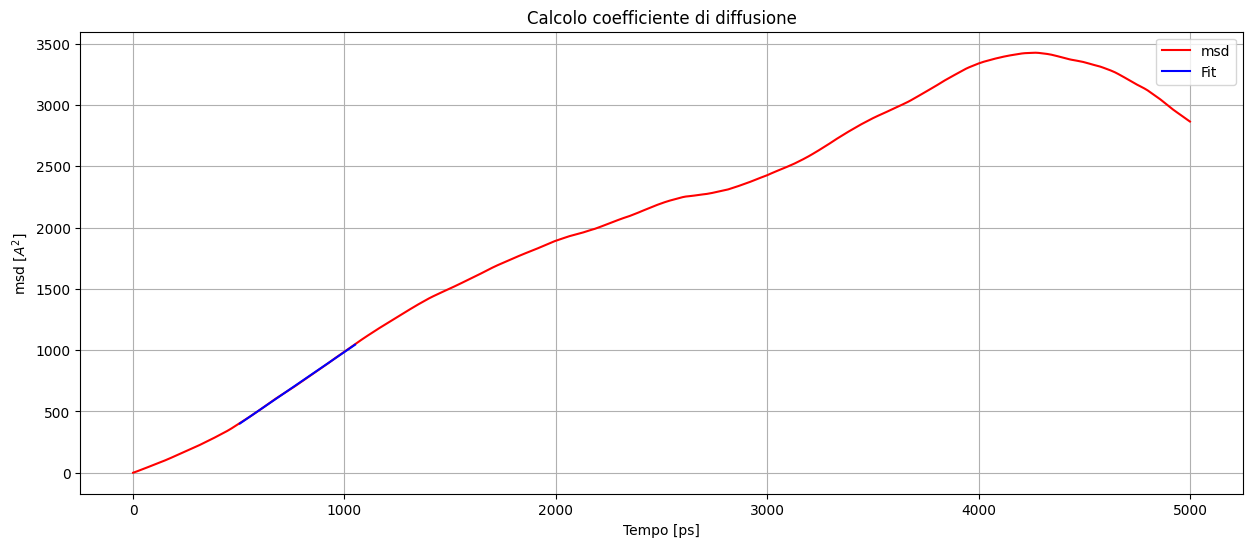

In [7]:
fig = plt.figure(figsize = (15, 6))

appo = np.loadtxt('diff/msd_py.dat')
plt.plot(appo[:, 0], appo[:, 1], color="red", label = 'msd')



#------------------------------------------------------#
#       Determinazione coefficiente di diffusione      #
#------------------------------------------------------#
x = appo[101:211, 0]
y = appo[101:211, 1]

params, covariance = curve_fit(linear_model, x, y) 
mf = params[0]
cf = params[1]
y_fit = mf * x + cf

plt.plot(x, y_fit, color="blue", label = 'Fit')
print('Il coefficiente di diffusione è pari a: ' + str(round(mf/2, 4)))


plt.title("Calcolo coefficiente di diffusione")
plt.xlabel("Tempo [ps]")
plt.ylabel(r"msd [$A^2$]")
plt.legend(loc = 'best')
plt.grid()
plt.show()

Il coefficiente di diffusione a 50 Kelvin risulta essere pari a:

$$
D\,=\,0.5895
$$

## Dipendenza dalla temperatura

Mi sono chiesto se il coefficiente di diffusione presentasse una dipendenza dalla temperatura T a cui avviene la diffusione. Per questo motivo ho scritto uno script bash che consentisse di eseguire in seguenza una decina di simulazioni, in modo tale da valutare la diffusione per

$$
T\,\in\,\left\{25,\,50,\,75,\,100,\,125,\,150,\,175,\,200,\,225,\,250,\,275,\,300\right\}\,\text{K}
$$

Riporto in primo luogo quale sia la mean-squared distance al variare della temperatura, in modo tale da poter valutare in che range effettuare il fit.

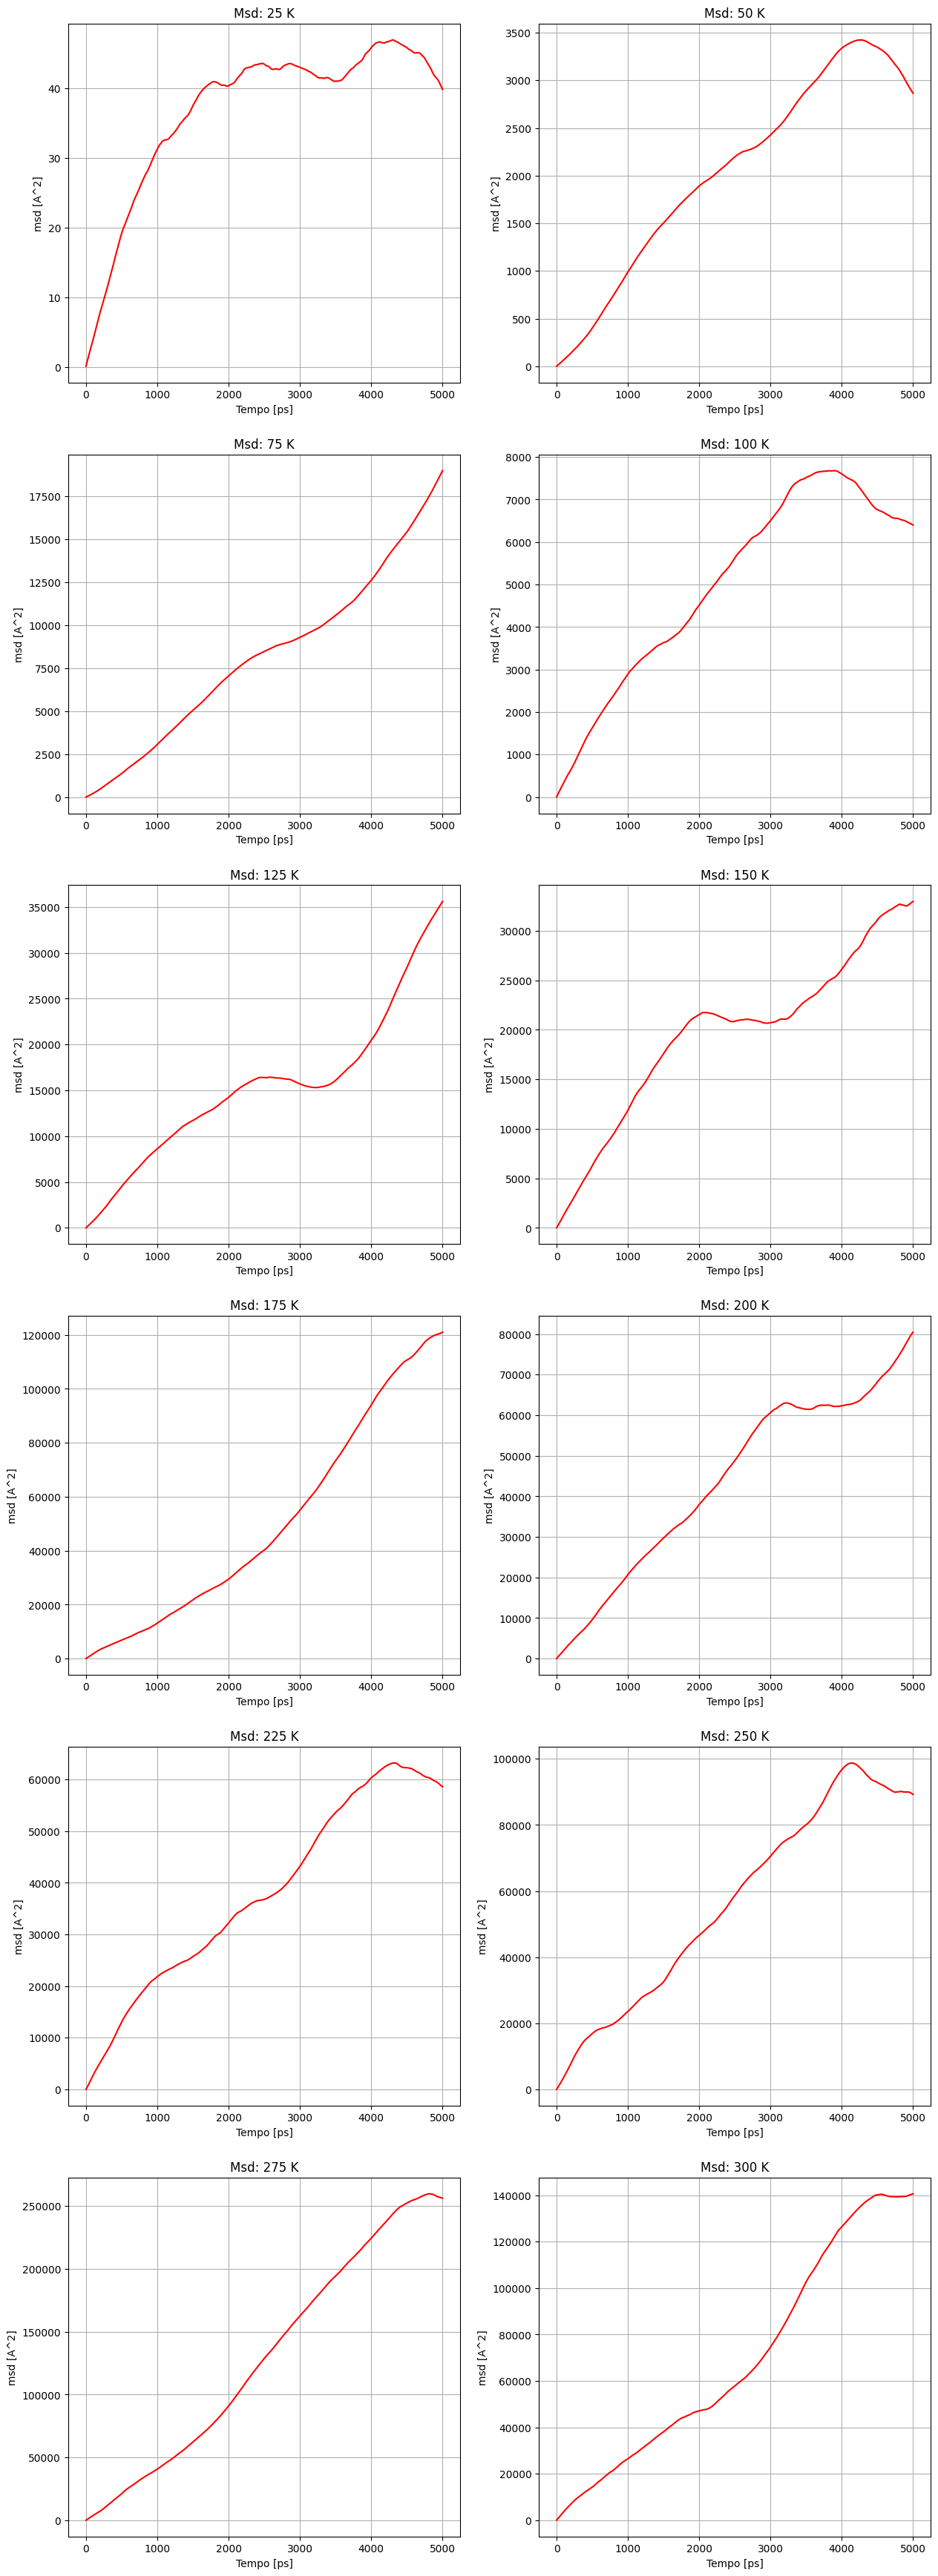

In [7]:
temp = np.array([i for i in range(25, 325, 25)])


# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 44))

for i in range(0, 6):

    for j in range(0, 2):
         #Valori assunti dalla msd
        msd = np.loadtxt("dipT/msd_py_"+str(temp[2*i+j])+".dat")


        ax = fig.add_subplot(6, 2, 2*i+j+1)
            
        ax.plot(msd[:, 0], msd[:, 1], color = 'red')
        ax.set_title('Msd: ' + str(temp[2*i+j]) + ' K')
        ax.set_xlabel('Tempo [ps]')
        ax.set_ylabel('msd [A^2]')
        ax.grid(True)
    
    

# Mostrare la figura con i grafici polari multipli
plt.show()

Osservando gli andamenti alla varie temperature, individuo quali siano gli estremi per i singoli fit. Tali quantità sono riportate nella prossima cella di codice.

In [10]:
def linear_model(x, m, c):
    return m * x + c

In [18]:
temp = np.array([i for i in range(25, 325, 25)])
xmin = [0, 101, 0, 0, 0, 0, 0, 0, 0, 200, 0, 600]   # Sono indici, per avere il vero intervallo è necessario moltiplicare per 5
xmax = [200, 221, 400, 600, 200, 400, 400, 600, 200, 800, 800, 800]   # Sono indici, per avere il vero intervallo è necessario moltiplicare per 5
coeffs = np.zeros(len(xmin))

for i in range(0, len(xmin)):
    msd = np.loadtxt("dipT/msd_py_"+str(temp[i])+".dat")

    x = msd[xmin[i]:xmax[i], 0]
    y = msd[xmin[i]:xmax[i], 1]

    params, covariance = curve_fit(linear_model, x, y) 
    mf = params[0]

    coeffs[i] = mf/2
    print('Il coefficiente di diffusione a ' + str(temp[i]) +' K è pari a ' + str(round(mf/2, 4)))

Il coefficiente di diffusione a 25 K è pari a 0.0158
Il coefficiente di diffusione a 50 K è pari a 0.5911
Il coefficiente di diffusione a 75 K è pari a 1.8056
Il coefficiente di diffusione a 100 K è pari a 1.0117
Il coefficiente di diffusione a 125 K è pari a 4.5031
Il coefficiente di diffusione a 150 K è pari a 5.564
Il coefficiente di diffusione a 175 K è pari a 7.2937
Il coefficiente di diffusione a 200 K è pari a 9.8255
Il coefficiente di diffusione a 225 K è pari a 11.3516
Il coefficiente di diffusione a 250 K è pari a 11.9072
Il coefficiente di diffusione a 275 K è pari a 29.149
Il coefficiente di diffusione a 300 K è pari a 26.9307


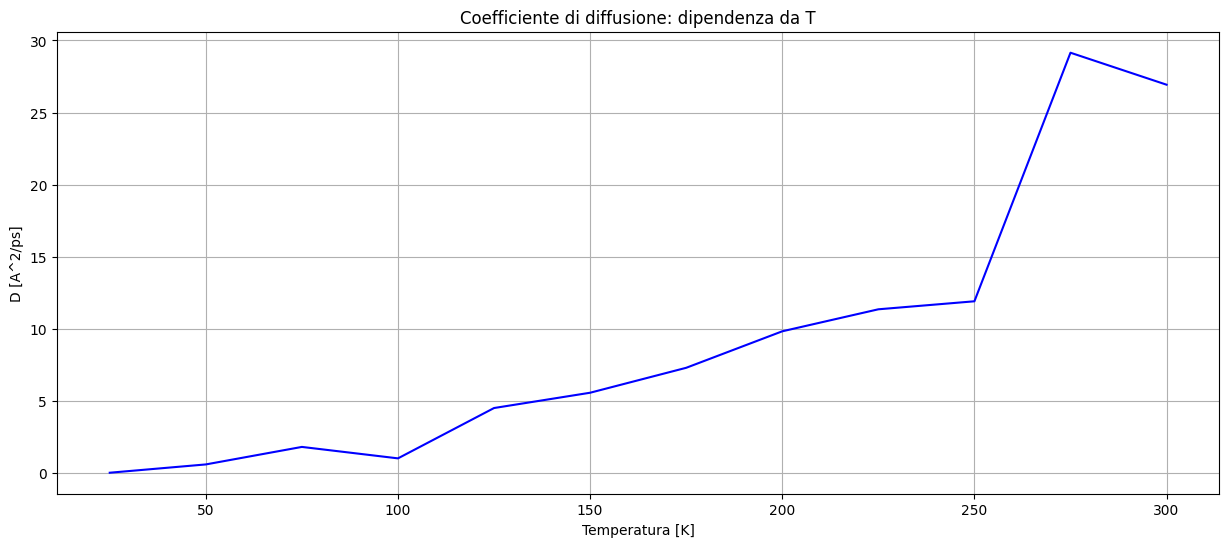

In [19]:
fig = plt.figure(figsize = (15, 6))

plt.plot(temp, coeffs, color="blue", markersize = 2)

plt.title("Coefficiente di diffusione: dipendenza da T")
plt.xlabel("Temperatura [K]")
plt.ylabel(r"D [A^2/ps]")
plt.grid()
plt.show()